In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pyod.utils.data import generate_data

from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
from pyod.models.abod import ABOD
from pyod.models.loda import LODA
from pyod.models.pca import PCA

from SSSD import SSSD

In [4]:
n_samples = 1000
outliers_fraction = 0.1
n_features=2
rng = np.random.RandomState(42)

In [5]:
X,ground_truth = generate_data(n_train=n_samples,n_features=n_features,contamination=outliers_fraction, train_only=True,random_state=rng)

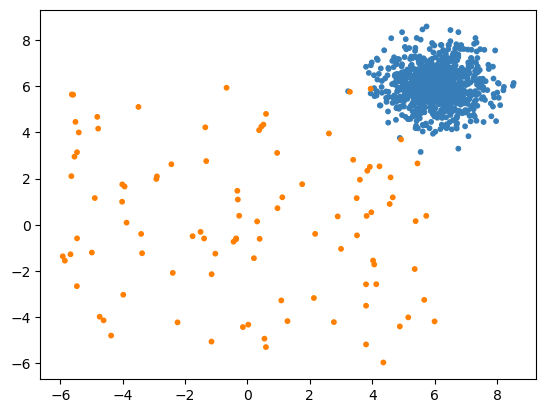

In [6]:
colors = np.array(["#377eb8", "#ff7f00"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(ground_truth.astype(int) + 1) // 2])

In [7]:
anomaly_algorithms = [
    ("LODA",LODA(contamination=outliers_fraction)),
    ("ABOD",ABOD(contamination=outliers_fraction)),
    ("iForest",IForest(contamination=outliers_fraction)),
    ('kNN',KNN(contamination=outliers_fraction)),
    ('LOF',LOF(contamination=outliers_fraction)),
    ("HBOS",HBOS(contamination=outliers_fraction)),
    ("OCSVM",OCSVM(contamination=outliers_fraction)),
    ("PCA",PCA(contamination=outliers_fraction))
]


LODA
Score-based SSSD: 3.6155661969048123
Distance-based SSSD: 8.82581746916696
Final SSSD: 6.220691833035886

ABOD
Score-based SSSD: 2.173029972990087
Distance-based SSSD: 5.411895212162653
Final SSSD: 3.79246259257637

iForest
Score-based SSSD: 2.9129265809858067
Distance-based SSSD: 6.848816302644531
Final SSSD: 4.880871441815168

kNN
Score-based SSSD: 4.617468534231899
Distance-based SSSD: 2.893987893751316
Final SSSD: 3.755728213991608

LOF
Score-based SSSD: 6.324087742285103
Distance-based SSSD: 21.809600602056452
Final SSSD: 14.066844172170779

HBOS
Score-based SSSD: 9.25580704793105
Distance-based SSSD: 8.763305440233015
Final SSSD: 9.009556244082033

OCSVM
Score-based SSSD: 2.1041478646503977
Distance-based SSSD: 4.241674043468215
Final SSSD: 3.172910954059306

PCA
Score-based SSSD: 1.3839960591194516
Distance-based SSSD: 10.255527794051822
Final SSSD: 5.819761926585636


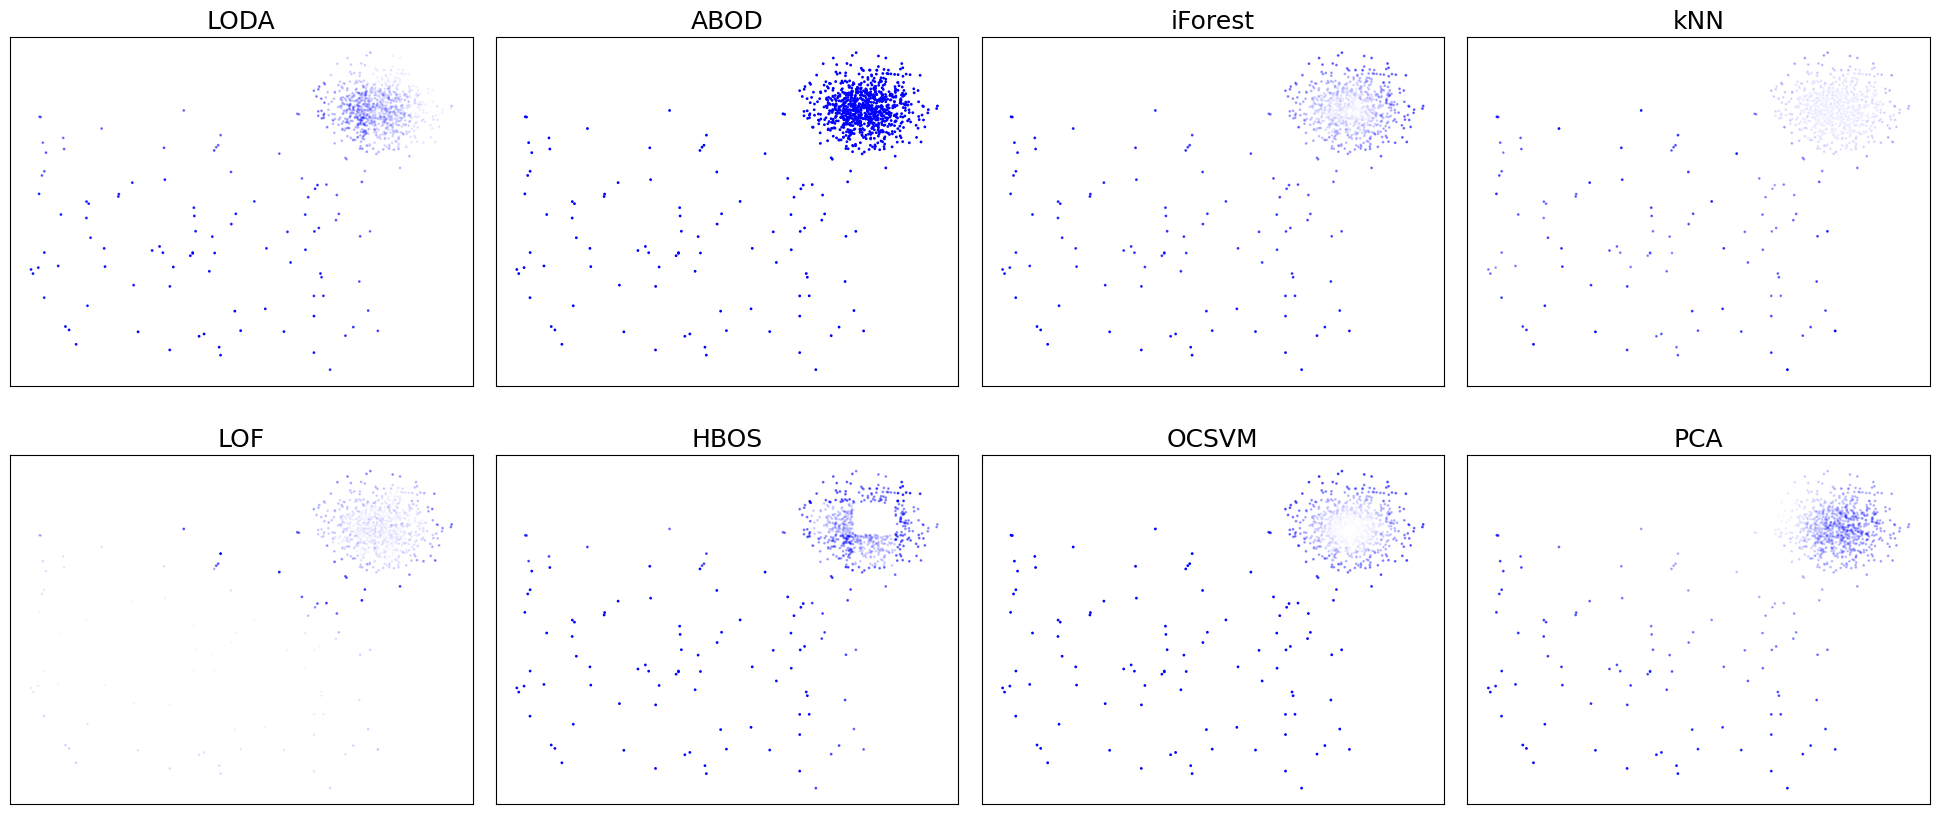

In [8]:
# Evaluate the results of anomaly detection algorithms
plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 8))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.2)

# Iterate over each algorithm and evaluate
for plot_num, (name, algorithm) in enumerate(anomaly_algorithms, start=1):
    # Fit and predict anomaly scores
    algorithm.fit(X)
    scores = algorithm.decision_function(X)
    
    # Normalize scores between 0 and 1
    scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
    
    # Compute SSSD scores
    sssd = SSSD(X, scores)
    
    print(f"\n{name}")
    _, score_sssd_sum, _ = sssd.get_Score_SSSD()
    print(f"Score-based SSSD: {score_sssd_sum}")
    
    _, distance_sssd_sum, _ = sssd.get_Distance_SSSD()
    print(f"Distance-based SSSD: {distance_sssd_sum}")
    
    _, final_sssd_sum, _ = sssd.get_final_SSSD()
    print(f"Final SSSD: {final_sssd_sum}")
    
    
    
    # Plot results
    plt.subplot(2, 4, plot_num)
    plt.title(name, size=18)
    plt.scatter(X[:, 0], X[:, 1], s=1, color='b', alpha=scores)
    plt.xticks(())
    plt.yticks(())

plt.show()


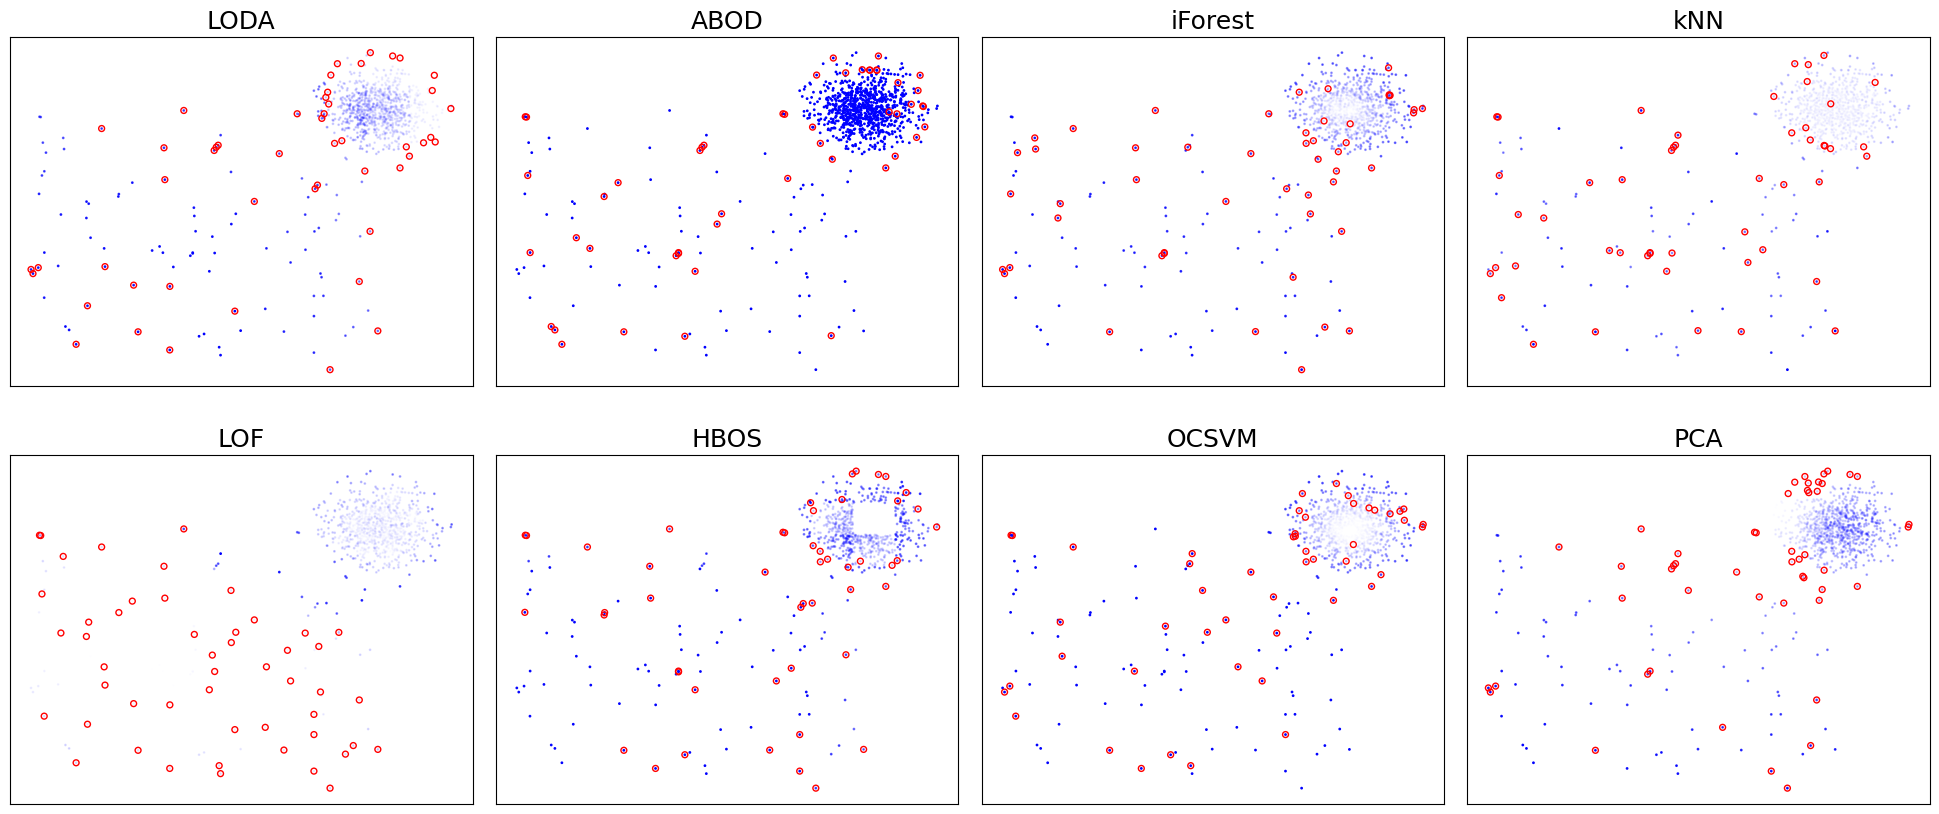

In [9]:
# Set up the plot
plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 8))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.2)

# Iterate through each anomaly detection algorithm
for plot_num, (name, algorithm) in enumerate(anomaly_algorithms, start=1):
    # Fit the algorithm to the data
    algorithm.fit(X)
    
    # Predict anomalies and compute anomaly scores
    y_pred = algorithm.predict(X)
    scores = algorithm.decision_function(X)
    scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))  # Normalize scores

    # Use SSSD class to calculate Distance-based SSSD and get mislabled points
    sssd = SSSD(X, scores)
    _, _, index = sssd.get_Distance_SSSD()

    # Create subplot for the algorithm
    plt.subplot(2, 4, plot_num)
    plt.title(name, size=18)

    # Plot the data points, with color intensity based on the anomaly score
    plt.scatter(X[:, 0], X[:, 1], s=1, color='b', alpha=scores)

    # Highlight the top 50 mislabled points with red circles
    plt.scatter(X[index[:50], 0], X[index[:50], 1], c='none', edgecolors='r', marker='o', s=18)

    # Remove axis labels for clarity
    plt.xticks(())
    plt.yticks(())

# Show the plot
plt.show()


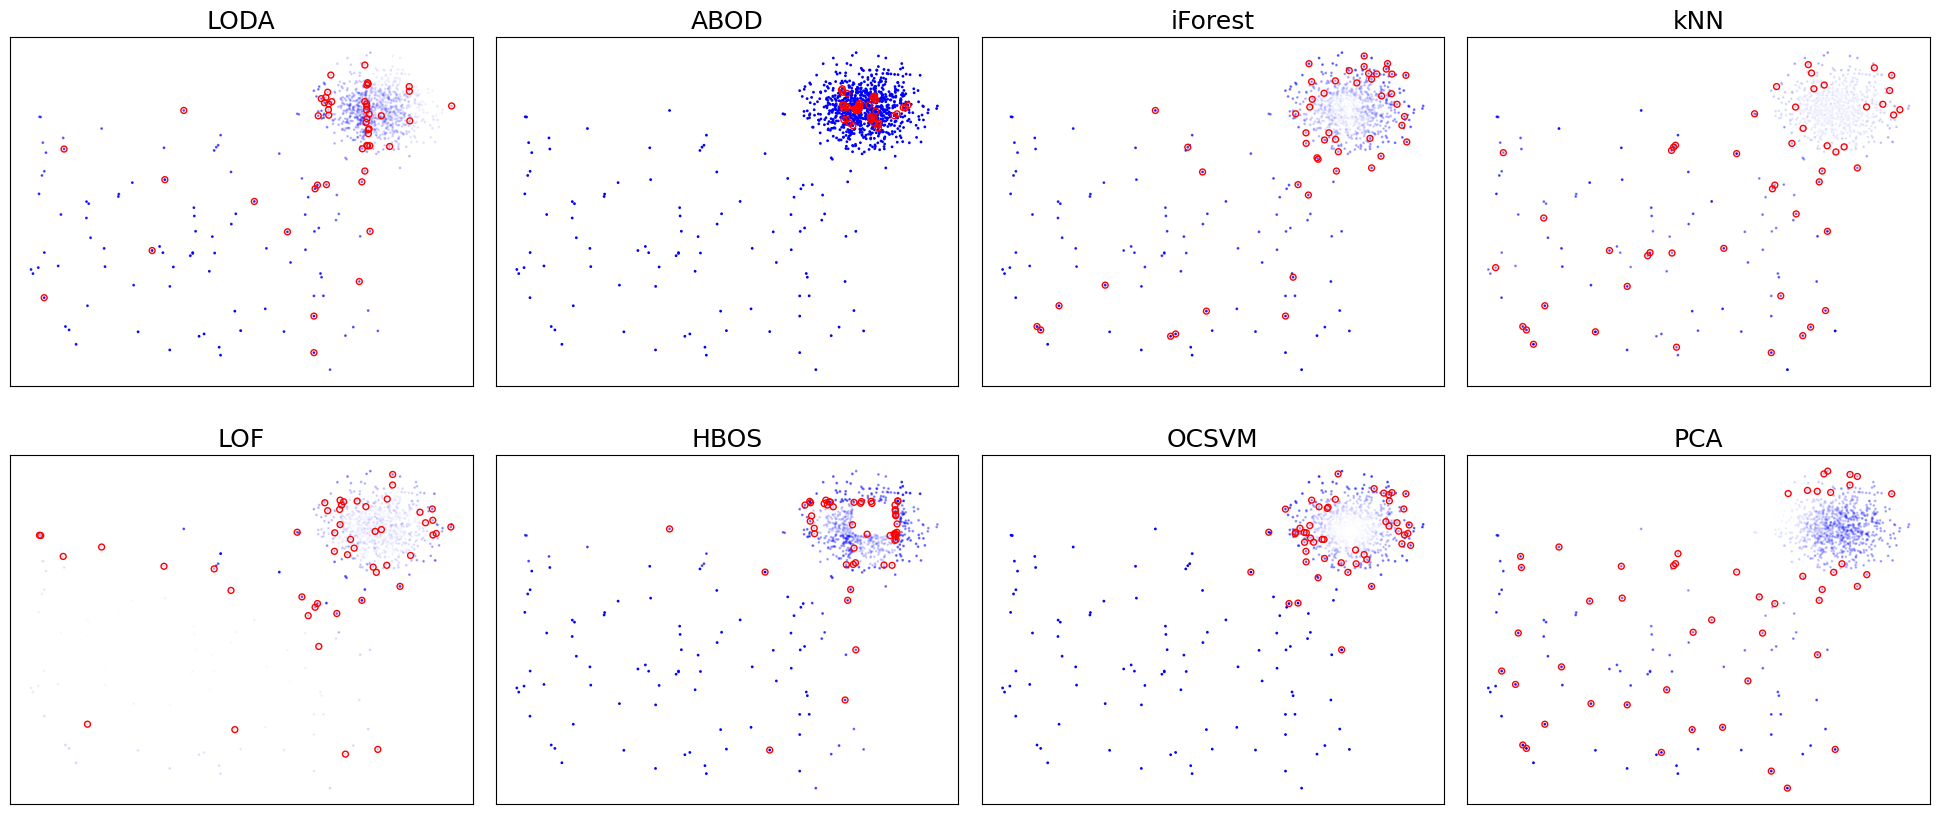

In [10]:
# Set up the plot
plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 8))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.2)

# Iterate through each anomaly detection algorithm
for plot_num, (name, algorithm) in enumerate(anomaly_algorithms, start=1):
    # Fit the algorithm to the data
    algorithm.fit(X)
    
    # Predict anomalies and compute anomaly scores
    y_pred = algorithm.predict(X)
    scores = algorithm.decision_function(X)
    scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))  # Normalize scores

    # Use SSSD class to calculate Score-based SSSD and get mislabled points
    sssd = SSSD(X, scores)
    _, _, index = sssd.get_Score_SSSD()

    # Create subplot for the algorithm
    plt.subplot(2, 4, plot_num)
    plt.title(name, size=18)

    # Plot the data points, with color intensity based on the anomaly score
    plt.scatter(X[:, 0], X[:, 1], s=1, color='b', alpha=scores)

    # Highlight the top 50 mislabled points with red circles
    plt.scatter(X[index[:50], 0], X[index[:50], 1], c='none', edgecolors='r', marker='o', s=18)

    # Remove axis labels for clarity
    plt.xticks(())
    plt.yticks(())

# Show the plot
plt.show()
